#Data Preprocessing

In [2]:
# Importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("/content/wine.csv", delimiter = ';')

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# Number of empty values (NaN)
counter_of_nan = 0

for lst in data.loc[:, data.isnull().any()].columns :  
    lst_boolean = data[lst].isna()                        
    for j in range( len(lst_boolean) ) :                     
        if lst_boolean[j] == True:
            counter_of_nan += 1

print('\nNumber of NaN values:', counter_of_nan)


Number of NaN values: 0


In [9]:
for lst in data.loc[:, data.isnull().any()].columns : 
    lst_boolean = data[lst].isna()                        
    for j in range( len(lst_boolean) ) :                     
        if lst_boolean[j] == True:
            data.loc[j, lst] = data.loc[j - 1, lst]

In [8]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [10]:
# Dropping unrelevant data
columns = ['citric acid', 'sulphates', 'pH']
data.drop(columns, axis = 1, inplace = True)
data

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,7.0,0.27,20.7,0.045,45.0,170.0,1.00100,8.8,6
1,6.3,0.30,1.6,0.049,14.0,132.0,0.99400,9.5,6
2,8.1,0.28,6.9,0.050,30.0,97.0,0.99510,10.1,6
3,7.2,0.23,8.5,0.058,47.0,186.0,0.99560,9.9,6
4,7.2,0.23,8.5,0.058,47.0,186.0,0.99560,9.9,6
...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,0.039,24.0,92.0,0.99114,11.2,6
4894,6.6,0.32,8.0,0.047,57.0,168.0,0.99490,9.6,5
4895,6.5,0.24,1.2,0.041,30.0,111.0,0.99254,9.4,6
4896,5.5,0.29,1.1,0.022,20.0,110.0,0.98869,12.8,7


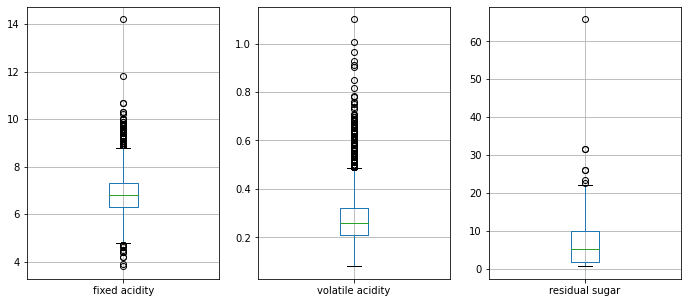

In [11]:
# Detecting outliers
plt.figure(figsize = (20, 5))
for i in range(3):
    plt.subplot(151 + i)
    data.boxplot(data.columns[i])

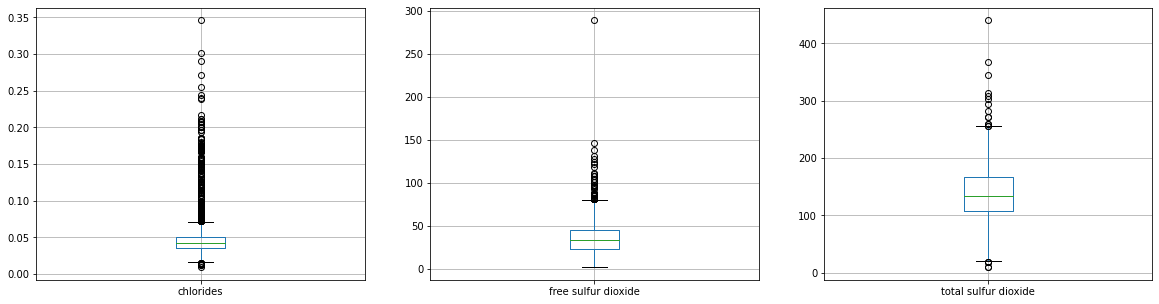

In [12]:
plt.figure(figsize = (20, 5))
for i in range(3, 6):
    plt.subplot(128 + i)
    data.boxplot(data.columns[i])

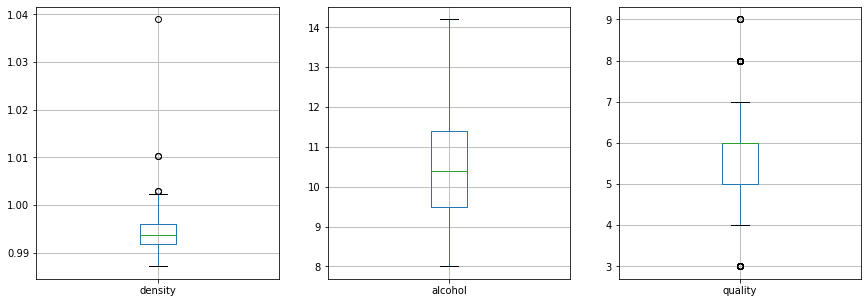

In [13]:
plt.figure(figsize = (20, 5))
for i in range(6, 9):
    plt.subplot(135 + i)
    data.boxplot(data.columns[i])

In [14]:
# Dropping outliers
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
data = data[~((data < (q1 - 1.5 * IQR)) |(data > (q3 + 1.5 * IQR))).any(axis=1)]
data

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
0,7.0,0.27,20.7,0.045,45.0,170.0,1.00100,8.8,6
1,6.3,0.30,1.6,0.049,14.0,132.0,0.99400,9.5,6
2,8.1,0.28,6.9,0.050,30.0,97.0,0.99510,10.1,6
3,7.2,0.23,8.5,0.058,47.0,186.0,0.99560,9.9,6
4,7.2,0.23,8.5,0.058,47.0,186.0,0.99560,9.9,6
...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,1.6,0.039,24.0,92.0,0.99114,11.2,6
4894,6.6,0.32,8.0,0.047,57.0,168.0,0.99490,9.6,5
4895,6.5,0.24,1.2,0.041,30.0,111.0,0.99254,9.4,6
4896,5.5,0.29,1.1,0.022,20.0,110.0,0.98869,12.8,7


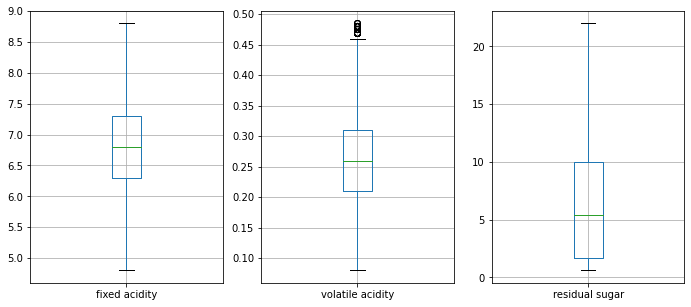

In [15]:
# Check if our outliers cleanup worked
plt.figure(figsize = (20, 5))
for i in range(3):
    plt.subplot(151 + i)
    data.boxplot(data.columns[i])

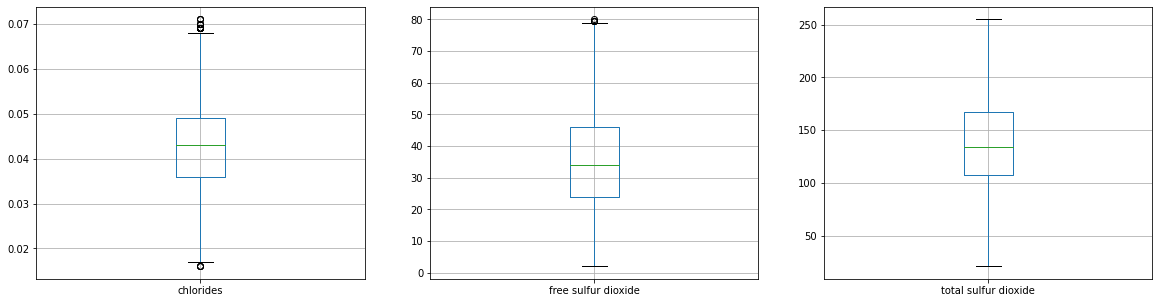

In [16]:
plt.figure(figsize = (20, 5))
for i in range(3, 6):
    plt.subplot(128 + i)
    data.boxplot(data.columns[i])

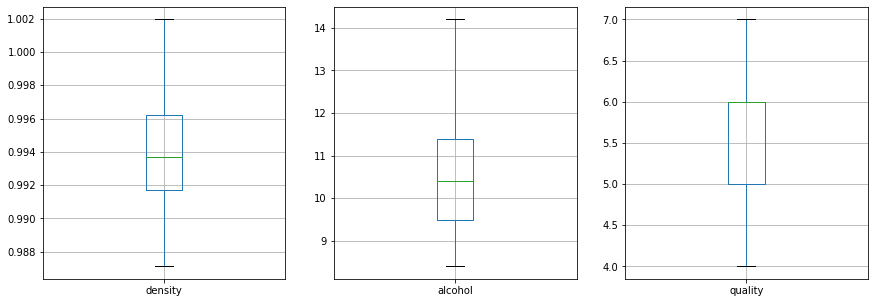

In [17]:
plt.figure(figsize = (20, 5))
for i in range(6, 9):
    plt.subplot(135 + i)
    data.boxplot(data.columns[i])

#Data Visualization


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61018fde90>]],
      dtype=object)

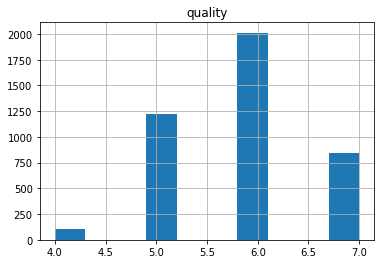

In [18]:
# Quality hist
data.hist('quality')

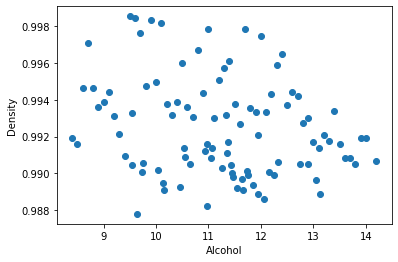

In [19]:
# Alcohol vs Density
plt.scatter(data['alcohol'].unique(), data.groupby('alcohol').mean()['density'])
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

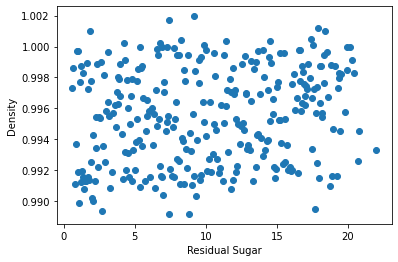

In [20]:
# Residual Sugar vs Density
plt.scatter(data['residual sugar'].unique(), data.groupby('residual sugar').mean()['density'])
plt.xlabel('Residual Sugar')
plt.ylabel('Density')
plt.show()

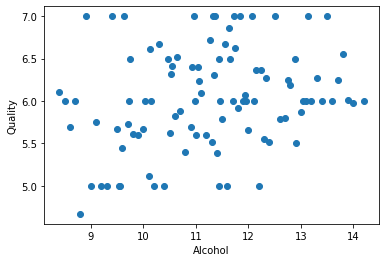

In [21]:
# Alcohol vs Quality
plt.scatter(data.alcohol.unique(), data.groupby('alcohol').mean()['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

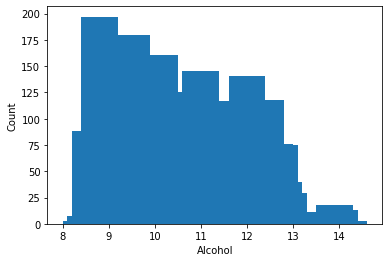

In [22]:
# Alcohol vs Count
plt.bar(data['alcohol'].unique(), data['alcohol'].value_counts())
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.show()

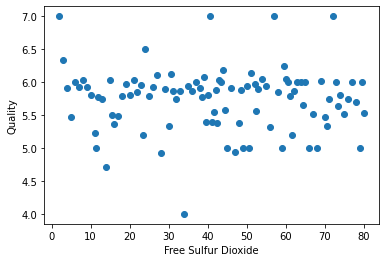

In [23]:
# Free Sulfur Dioxide vs Quality
plt.scatter(data['free sulfur dioxide'].unique(), data.groupby('free sulfur dioxide').mean()['quality'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Quality')
plt.show()

#Relationships in data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f610226c490>]],
      dtype=object)

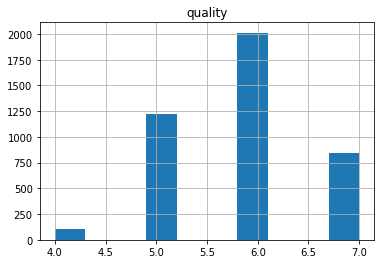

In [24]:
data.hist('quality')

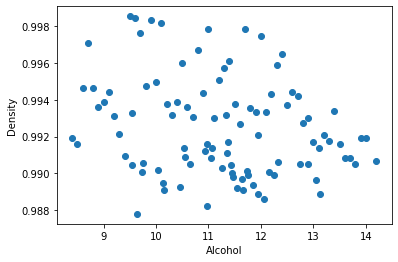

In [25]:
plt.scatter(data['alcohol'].unique(), data.groupby('alcohol').mean()['density'])
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

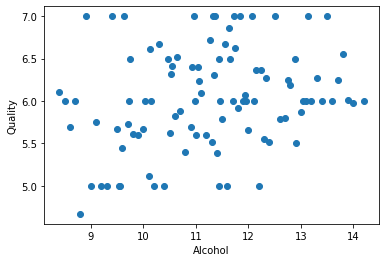

In [26]:
plt.scatter(data.alcohol.unique(), data.groupby('alcohol').mean()['quality'])
plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.show()

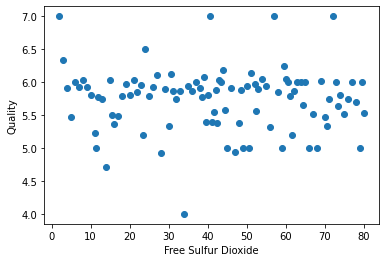

In [27]:
plt.scatter(data['free sulfur dioxide'].unique(), data.groupby('free sulfur dioxide').mean()['quality'])
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Quality')
plt.show()

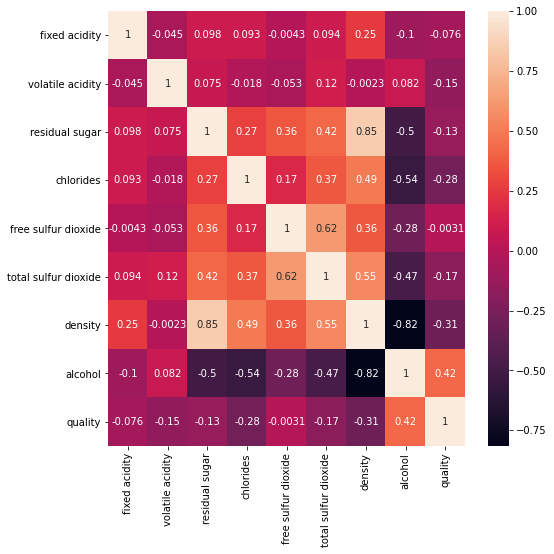

In [28]:
import seaborn as sb

plt.figure(figsize = (8, 8))
sb.heatmap(data.corr(), annot= True)